In [1]:
path = 'https://raw.githubusercontent.com/LunusMax/football-data/refs/heads/main/Brasileirao/Laterais_Brasileirao/df_PH.csv'

In [2]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from matplotlib import cm
from matplotlib.colors import ListedColormap

In [3]:
data = pd.read_csv(path, sep=';')

In [4]:
data.head(15)

,Jogador,Minutos,Gls,xG,Assists,xAG,Tkl,TklW,Int,Blocks,...,Cmp,Cmp%,PrgC,PrgP,PPA,Crosses,SCA,CrsPA,GCA,PPG
0,Paulo Henrique,1953,1,1.5,6,2.9,72,49,27,36,...,883,78.8,75,69,28,88,62,20,10,1.29


In [5]:
data.rename(columns={'Minutos': 'Minutes'}, inplace=True)

In [6]:
# Métricas por 90 minutos
data['Gls/90'] = (data['Gls'] * 90) / (data['Minutes'])
data['Assists/90'] = (data['Assists'] * 90) / (data['Minutes'])
data['Tkl/90'] = (data['Tkl'] * 90) / (data['Minutes'])
data['TklW/90'] = (data['TklW'] * 90) / (data['Minutes'])
data['Int/90'] = (data['Int'] * 90) / (data['Minutes'])
data['Cmp/90'] = (data['Cmp'] * 90) / (data['Minutes'])
data['Blocks/90'] = (data['Blocks'] * 90) / (data['Minutes'])
data['PassBlocks/90'] = (data['PassBlocks'] * 90) / (data['Minutes'])
data['PrgC/90'] = (data['PrgC'] * 90) / (data['Minutes'])
data['PrgP/90'] = (data['PrgP'] * 90) / (data['Minutes'])
data['PPA/90'] = (data['PPA'] * 90) / (data['Minutes'])
data['Crosses/90'] = (data['Crosses'] * 90) / (data['Minutes'])
data['SCA/90'] = (data['SCA'] * 90) / (data['Minutes'])
data['CrsPA/90'] = (data['CrsPA'] * 90) / (data['Minutes'])
data['GCA/90'] = (data['GCA'] * 90) / (data['Minutes'])

In [7]:
data.head()

,Jogador,Minutes,Gls,xG,Assists,xAG,Tkl,TklW,Int,Blocks,...,Cmp/90,Blocks/90,PassBlocks/90,PrgC/90,PrgP/90,PPA/90,Crosses/90,SCA/90,CrsPA/90,GCA/90
0,Paulo Henrique,1953,1,1.5,6,2.9,72,49,27,36,...,40.691244,1.658986,1.152074,3.456221,3.179724,1.290323,4.0553,2.857143,0.921659,0.460829


In [8]:
data['Cmp%'] = data['Cmp%'] / 100

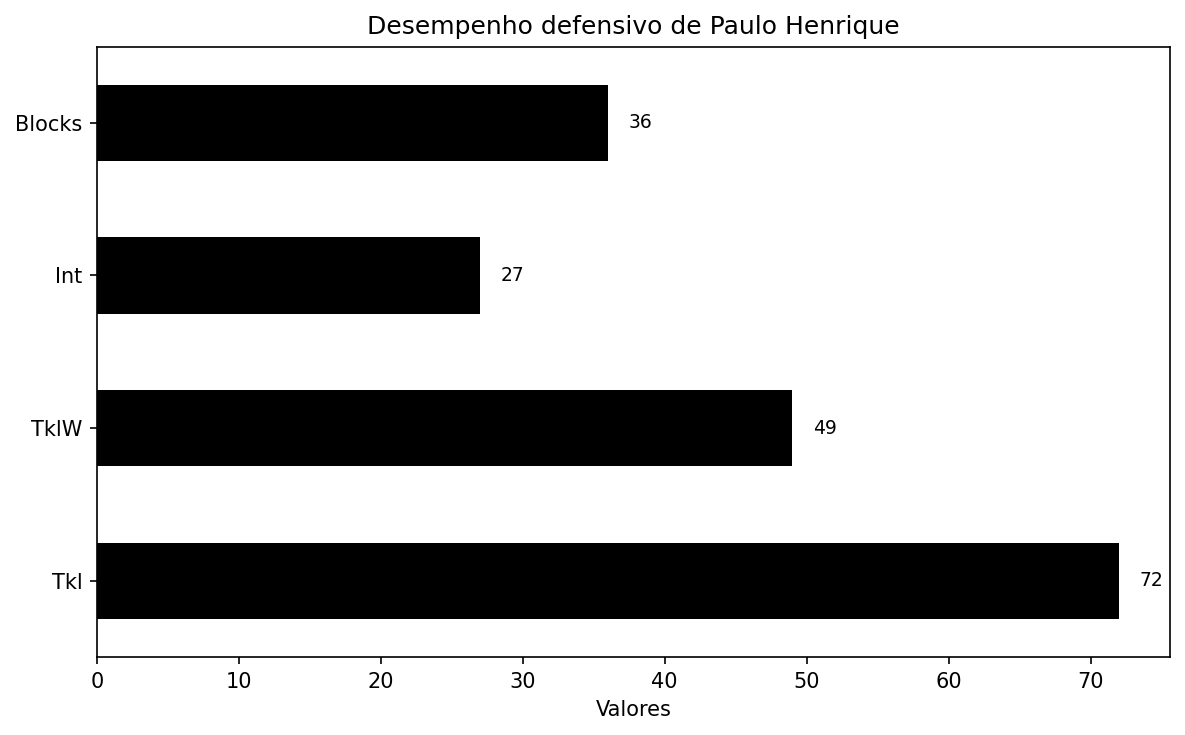

In [62]:
import matplotlib.pyplot as plt

cols = ['Tkl', 'TklW', 'Int', 'Blocks']
df_plot = data[cols].T
df_plot.columns = ['Paulo Henrique']

# Cria a figura com tamanho padronizado
fig, ax = plt.subplots(figsize=(8, 5))

# Gráfico de barras horizontais
df_plot.plot(kind='barh', legend=False, color='black', ax=ax)

plt.title('Desempenho defensivo de Paulo Henrique')
plt.xlabel('Valores')
plt.tight_layout()

# === Adiciona rótulos numéricos ===
for i, v in enumerate(df_plot['Paulo Henrique']):
    ax.text(v + (max(df_plot['Paulo Henrique']) * 0.02),
            i,
            f'{v}',
            va='center',
            fontsize=9)

plt.show()


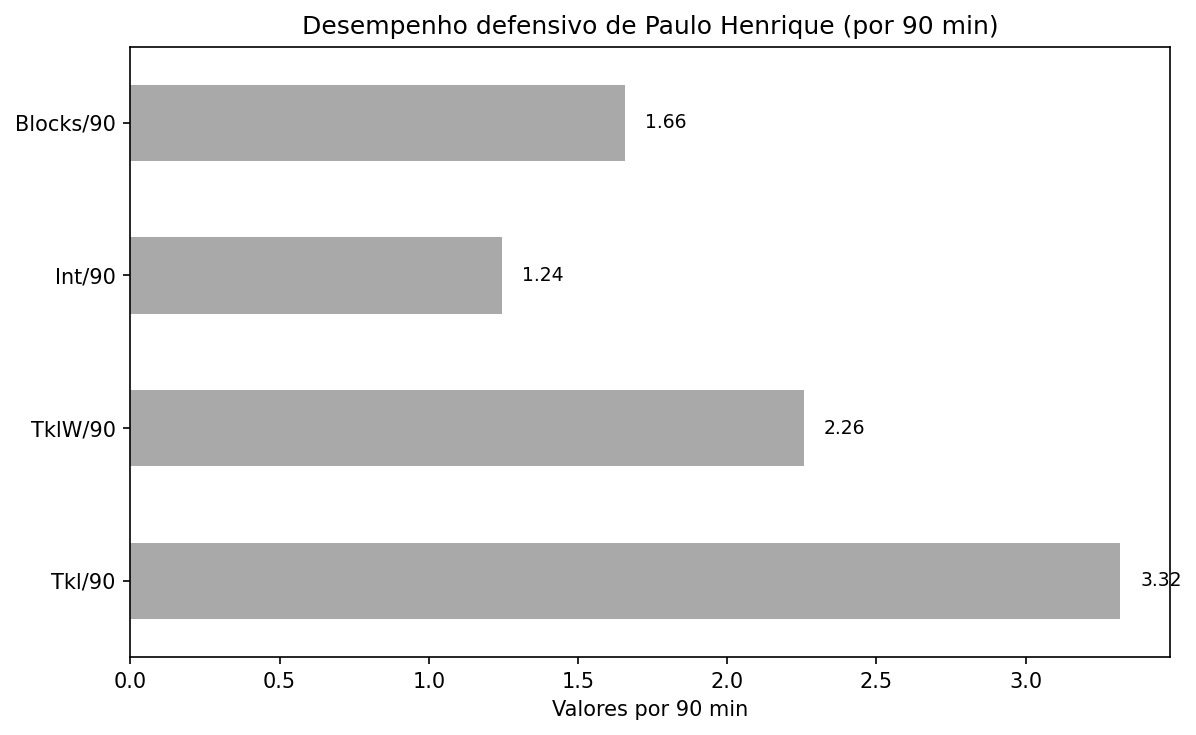

In [63]:
import matplotlib.pyplot as plt

# --- Dados ---
cols = ['Tkl/90', 'TklW/90', 'Int/90', 'Blocks/90']
df_plot = data[cols].T
df_plot.columns = ['Paulo Henrique']

# --- Criação da figura e do eixo ---
fig, ax = plt.subplots(figsize=(8, 5))

# --- Gráfico ---
df_plot.plot(kind='barh', legend=False, color='darkgrey', ax=ax)

# --- Títulos e layout ---
plt.title('Desempenho defensivo de Paulo Henrique (por 90 min)')
plt.xlabel('Valores por 90 min')
plt.tight_layout()

# --- Rótulos numéricos ---
for i, v in enumerate(df_plot['Paulo Henrique']):
    ax.text(v + (max(df_plot['Paulo Henrique']) * 0.02),
            i,
            f'{v:.2f}',
            va='center',
            fontsize=9)

plt.show()


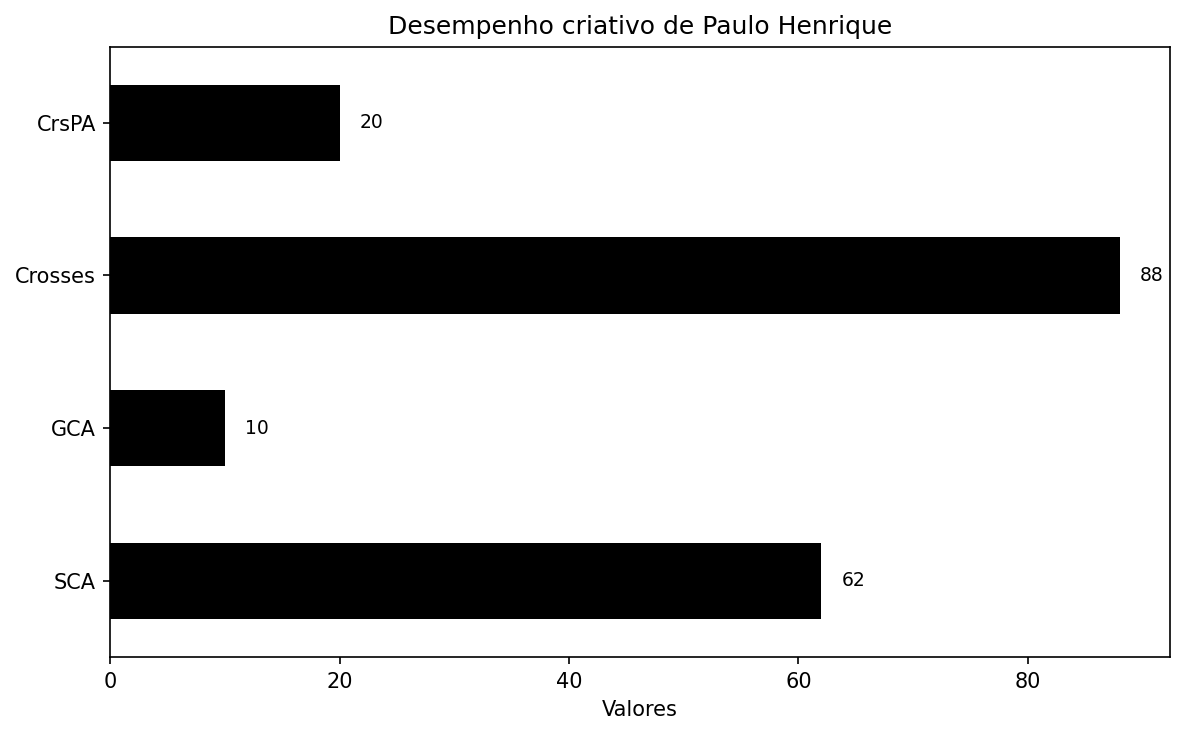

In [64]:
import matplotlib.pyplot as plt

# Métricas criativas (com cruzamentos incluídos)
cols = ['SCA', 'GCA', 'Crosses', 'CrsPA']
df_plot = data[cols].T
df_plot.columns = ['Paulo Henrique']

# Cria a figura com tamanho padronizado e o eixo
fig, ax = plt.subplots(figsize=(8, 5))

# Gráfico de barras horizontais
df_plot.plot(kind='barh', legend=False, color='black', ax=ax)

# Título e layout
plt.title('Desempenho criativo de Paulo Henrique')
plt.xlabel('Valores')
plt.tight_layout()

# Rótulos numéricos
for i, v in enumerate(df_plot['Paulo Henrique']):
    ax.text(v + (max(df_plot['Paulo Henrique']) * 0.02),  # deslocamento proporcional
            i,
            f'{v}',
            va='center',
            fontsize=9)

plt.show()


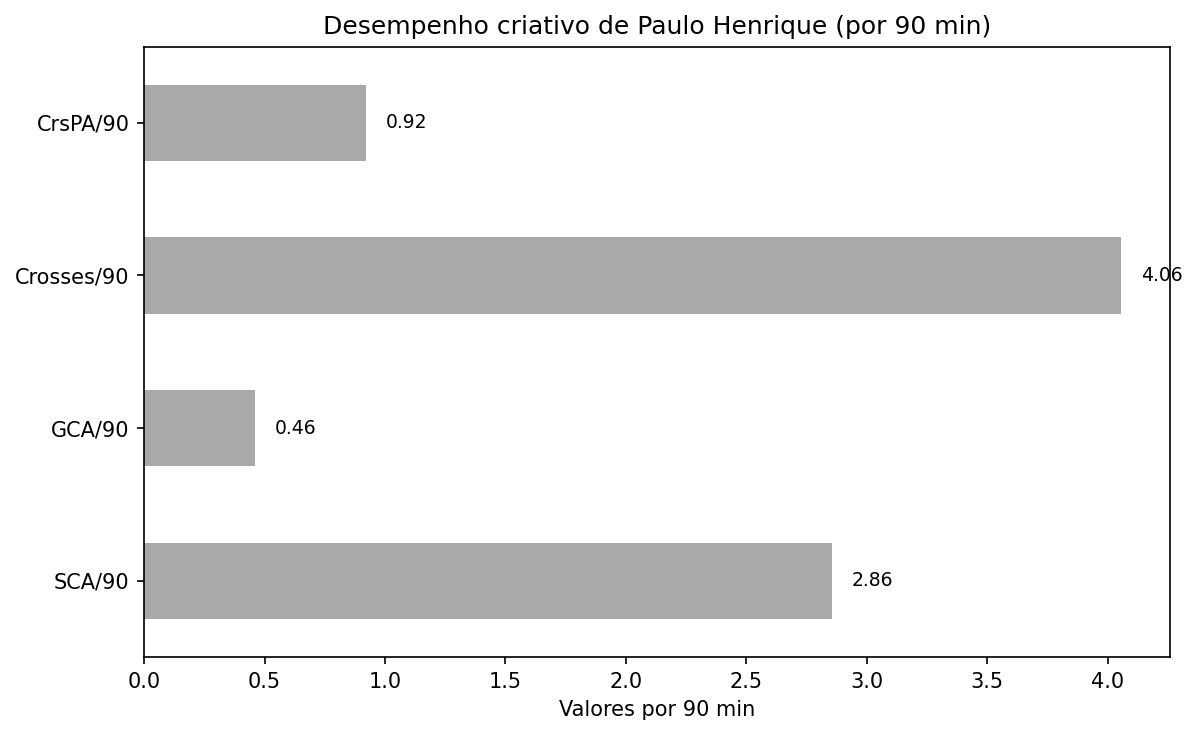

In [65]:
import matplotlib.pyplot as plt

cols = ['SCA/90', 'GCA/90', 'Crosses/90', 'CrsPA/90']
df_plot = data[cols].T
df_plot.columns = ['Paulo Henrique']

# Cria figura maior
fig, ax = plt.subplots(figsize=(8, 5))

# Cria o gráfico e guarda o eixo
df_plot.plot(kind='barh', legend=False, color='darkgray', ax=ax)

plt.title('Desempenho criativo de Paulo Henrique (por 90 min)')
plt.xlabel('Valores por 90 min')
plt.tight_layout()

# === Adiciona rótulos numéricos ===
for i, v in enumerate(df_plot['Paulo Henrique']):
    ax.text(v + (max(df_plot['Paulo Henrique']) * 0.02),
            i,
            f'{v:.2f}',
            va='center',
            fontsize=9)

plt.show()


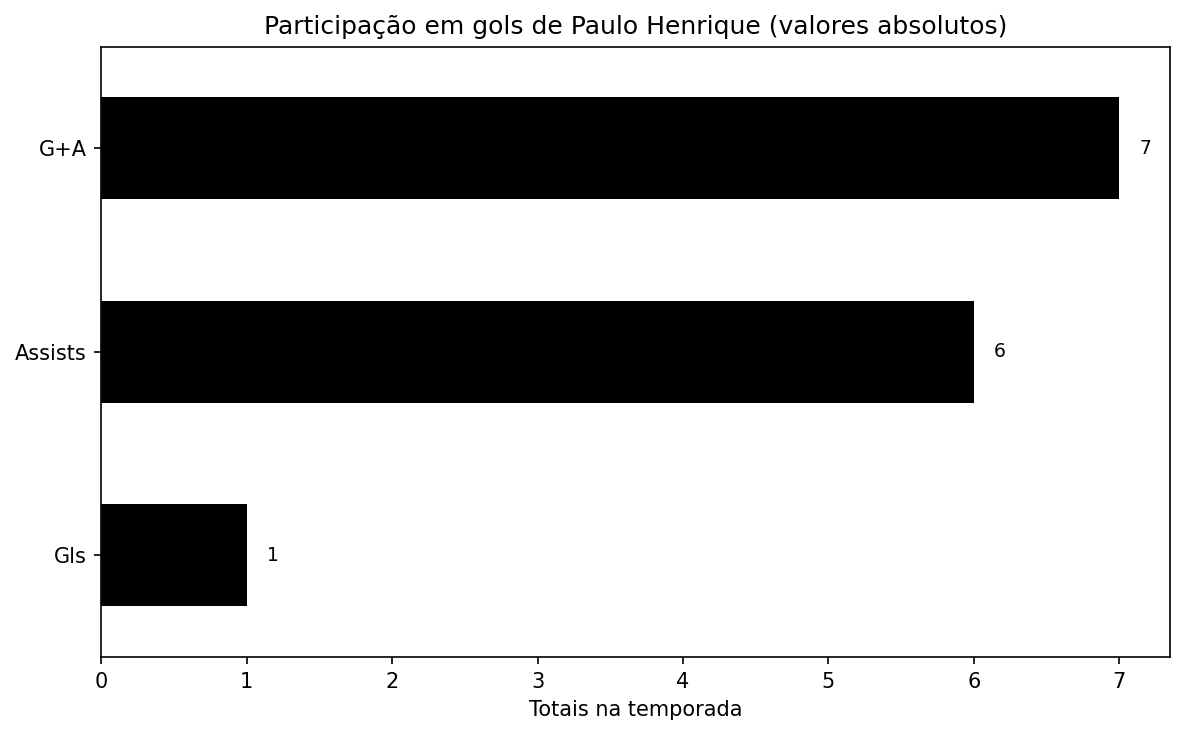

In [66]:
import matplotlib.pyplot as plt

# Cria a coluna combinada (caso ainda não exista)
data['G+A'] = data['Gls'] + data['Assists']

# Seleciona as métricas
cols = ['Gls', 'Assists', 'G+A']
df_plot = data[cols].T
df_plot.columns = ['Paulo Henrique']

# Cria figura padronizada
fig, ax = plt.subplots(figsize=(8, 5))

# Gráfico de barras horizontais em preto
df_plot.plot(kind='barh', legend=False, color='black', ax=ax)

plt.title('Participação em gols de Paulo Henrique (valores absolutos)')
plt.xlabel('Totais na temporada')
plt.tight_layout()

# Rótulos numéricos em cinza claro
for i, v in enumerate(df_plot['Paulo Henrique']):
    ax.text(v + (max(df_plot['Paulo Henrique']) * 0.02),
            i,
            f'{v:.0f}',
            va='center',
            fontsize=9)

plt.show()


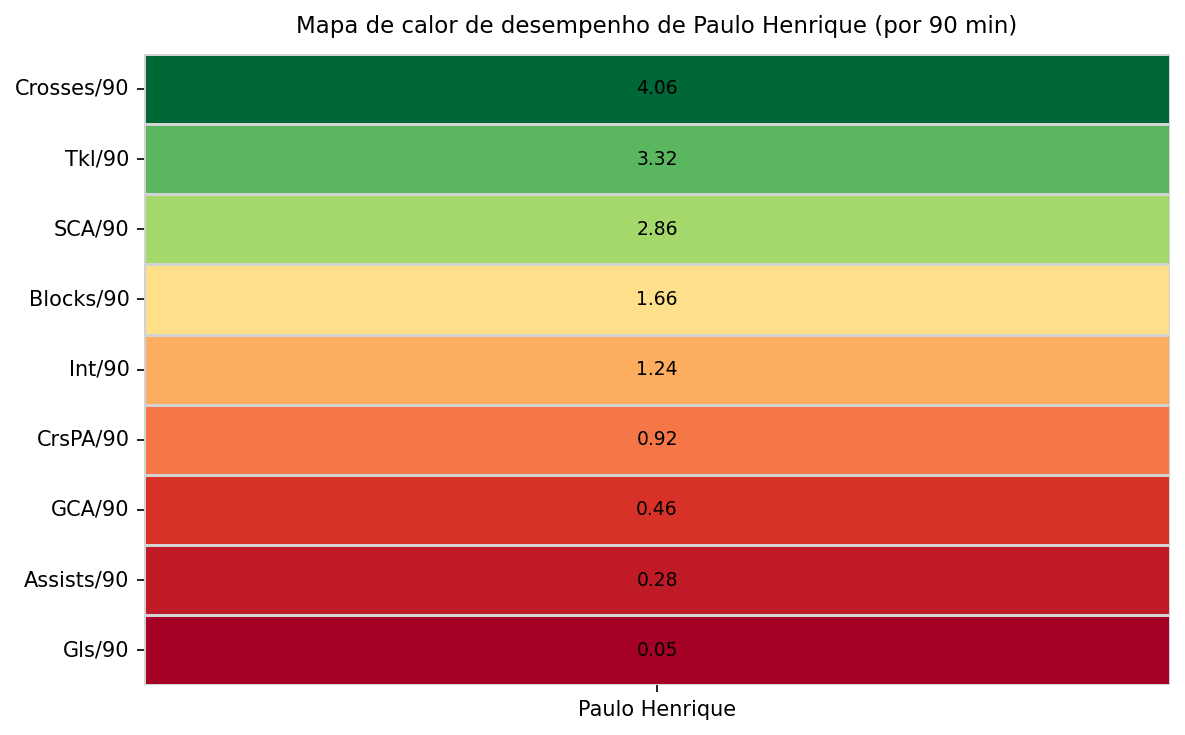

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Métricas representativas
cols = ['Tkl/90', 'Int/90', 'Blocks/90', 'SCA/90', 'GCA/90',
        'Crosses/90', 'CrsPA/90', 'Gls/90', 'Assists/90']

df_plot = data[cols].T
df_plot.columns = ['Paulo Henrique']

# Ordena do maior para o menor
df_plot = df_plot.sort_values(by='Paulo Henrique', ascending=False)

# === Criação do mapa de calor ===
plt.figure(figsize=(8, 5))
sns.heatmap(
    df_plot,
    annot=True,
    cmap='RdYlGn',   # vermelho → amarelo → verde
    cbar=False,
    linewidths=0.5,
    linecolor='lightgray',
    fmt=".2f",
    annot_kws={"fontsize": 9, "color": "black"}
)

plt.title('Mapa de calor de desempenho de Paulo Henrique (por 90 min)', fontsize=11, pad=10)
plt.ylabel('')
plt.xlabel('')
plt.tight_layout()
plt.show()

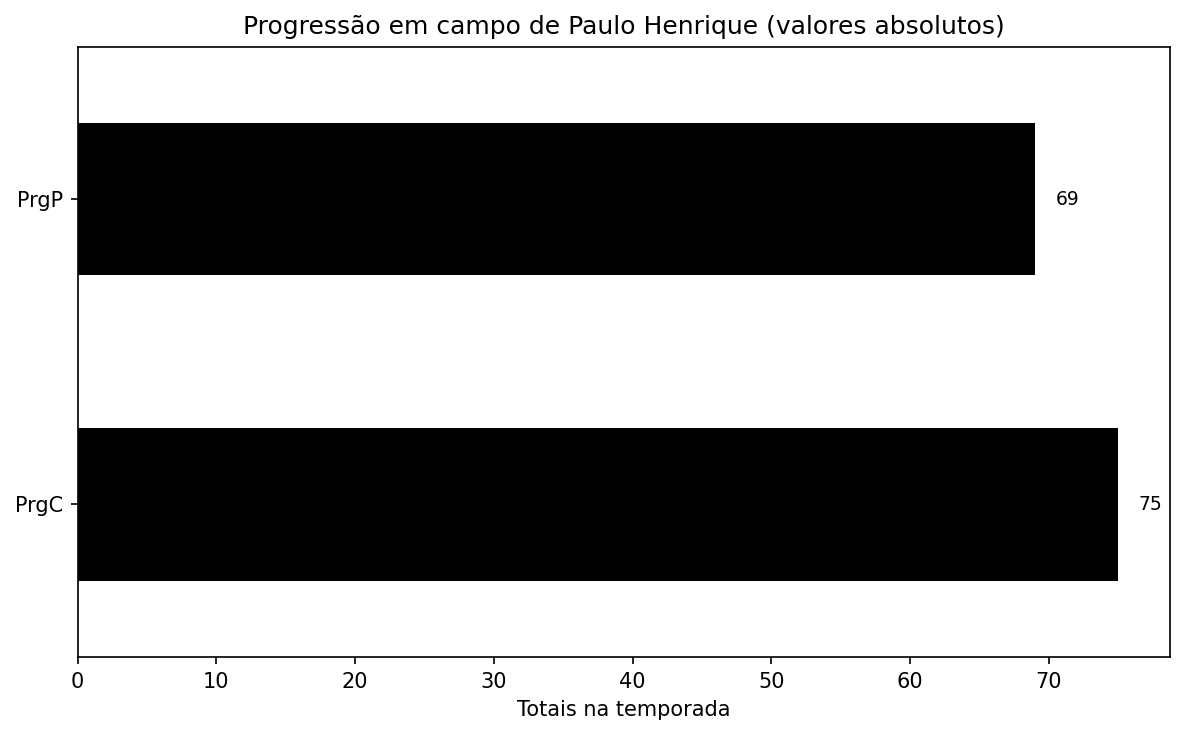

In [54]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,5))

cols_abs = ['PrgC', 'PrgP']
df_abs = data[cols_abs].T
df_abs.columns = ['Paulo Henrique']

# Barras pretas — valores totais
df_abs.plot(kind='barh', legend=False, color='black', ax=ax)

plt.title('Progressão em campo de Paulo Henrique (valores absolutos)')
plt.xlabel('Totais na temporada')

# Rótulos numéricos em cinza claro
for i, v in enumerate(df_abs['Paulo Henrique']):
    ax.text(v + (max(df_abs['Paulo Henrique']) * 0.02),
            i, f'{v:.0f}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

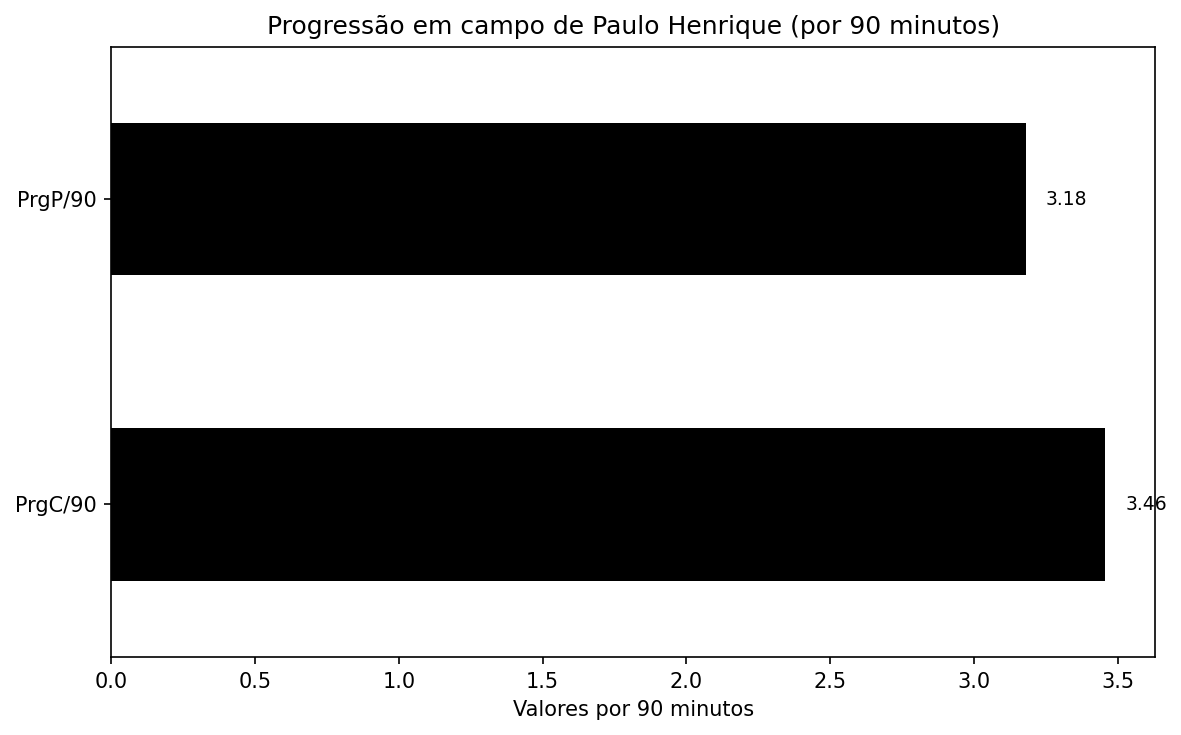

In [56]:
fig, ax = plt.subplots(figsize=(8,5))

cols_per90 = ['PrgC/90', 'PrgP/90']
df_90 = data[cols_per90].T
df_90.columns = ['Paulo Henrique']

# Barras pretas — valores por 90
df_90.plot(kind='barh', legend=False, color='black', ax=ax)

plt.title('Progressão em campo de Paulo Henrique (por 90 minutos)')
plt.xlabel('Valores por 90 minutos')

# Rótulos numéricos em cinza claro
for i, v in enumerate(df_90['Paulo Henrique']):
    ax.text(v + (max(df_90['Paulo Henrique']) * 0.02),
            i, f'{v:.2f}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
from datetime import date

# Caminho do PDF
pdf_path = f"Scout_PH_Francisco_Rhobert_{date.today()}.pdf"

FIGSIZE = (8, 5)

with PdfPages(pdf_path) as pdf:

    # === CAPA ===
    fig, ax = plt.subplots(figsize=FIGSIZE)
    ax.axis('off')
    ax.text(0.5, 0.7, "SCOUT DO PH", ha='center', va='center', fontsize=26, weight='bold')
    ax.text(0.5, 0.5, "Francisco Rhobert", ha='center', va='center', fontsize=20)
    ax.text(0.5, 0.35, "Análise por Lucio Nunes", ha='center', fontsize=11, style='italic')
    pdf.savefig(fig, bbox_inches='tight')
    plt.close(fig)

    # === PÁGINA 2: EXPLICAÇÃO DAS MÉTRICAS ===
    explicacao = """
    ⚙️ MÉTRICAS AVALIADAS

    DEFENSIVAS:
    • Tkl → Desarmes tentados (tackles realizados pelo jogador).
    • TklW → Desarmes ganhos (quando o desarme resulta na posse de bola).
    • Int → Interceptações (leituras defensivas antecipando passes adversários).
    • Blocks → Bloqueios de finalizações, passes ou cruzamentos.

    CRIATIVAS / OFENSIVAS:
    • SCA → Shot-Creating Actions (ações que geram finalizações, ex: passe, drible, falta sofrida).
    • GCA → Goal-Creating Actions (ações que resultam diretamente em gol).
    • Crosses → Total de cruzamentos realizados.
    • CrsPA → Cruzamentos que chegam à área adversária.

    CONTRIBUIÇÃO DIRETA:
    • Gls → Gols marcados.
    • Assists → Assistências diretas.
    • G+A → Soma de gols e assistências.

    PROGRESSÃO EM CAMPO:
    • PrgC → Progressive Carries (conduções progressivas — quantas vezes o jogador carrega a bola adiante).
    • PrgP → Progressive Passes (passes progressivos — quantos passes avançam significativamente o time ao ataque).

    AJUSTE TEMPORAL:
    • As métricas com “/90” representam o desempenho médio do jogador a cada 90 minutos jogados,
      permitindo comparações justas entre atletas com diferentes tempos de jogo.

    MAPA DE CALOR:
    • Representa o equilíbrio das métricas, onde o verde indica pontos fortes e o vermelho pontos a evoluir.
    """
    fig, ax = plt.subplots(figsize=FIGSIZE)
    ax.axis('off')
    ax.text(0.05, 0.95, explicacao, va='top', fontsize=9.5, wrap=True)
    pdf.savefig(fig, bbox_inches='tight')
    plt.close(fig)

    # === GRÁFICO 1: DEFENSIVO ===
    cols = ['Tkl', 'TklW', 'Int', 'Blocks']
    df_plot = data[cols].T
    df_plot.columns = ['Paulo Henrique']
    fig, ax = plt.subplots(figsize=FIGSIZE)
    df_plot.plot(kind='barh', legend=False, color='black', ax=ax)
    plt.title('Desempenho defensivo de Paulo Henrique')
    plt.xlabel('Valores')
    for i, v in enumerate(df_plot['Paulo Henrique']):
        ax.text(v + (max(df_plot['Paulo Henrique']) * 0.02), i, f'{v}', va='center', fontsize=9)
    plt.tight_layout()
    pdf.savefig(fig, bbox_inches='tight')
    plt.close(fig)

    # === GRÁFICO 2: DEFENSIVO /90 ===
    cols = ['Tkl/90', 'TklW/90', 'Int/90', 'Blocks/90']
    df_plot = data[cols].T
    df_plot.columns = ['Paulo Henrique']
    fig, ax = plt.subplots(figsize=FIGSIZE)
    df_plot.plot(kind='barh', legend=False, color='darkgrey', ax=ax)
    plt.title('Desempenho defensivo de Paulo Henrique (por 90 min)')
    plt.xlabel('Valores por 90 min')
    for i, v in enumerate(df_plot['Paulo Henrique']):
        ax.text(v + (max(df_plot['Paulo Henrique']) * 0.02), i, f'{v:.2f}', va='center', fontsize=9)
    plt.tight_layout()
    pdf.savefig(fig, bbox_inches='tight')
    plt.close(fig)

    # === GRÁFICO 3: CRIATIVO ===
    cols = ['SCA', 'GCA', 'Crosses', 'CrsPA']
    df_plot = data[cols].T
    df_plot.columns = ['Paulo Henrique']
    fig, ax = plt.subplots(figsize=FIGSIZE)
    df_plot.plot(kind='barh', legend=False, color='black', ax=ax)
    plt.title('Desempenho criativo de Paulo Henrique')
    plt.xlabel('Valores')
    for i, v in enumerate(df_plot['Paulo Henrique']):
        ax.text(v + (max(df_plot['Paulo Henrique']) * 0.02), i, f'{v}', va='center', fontsize=9)
    plt.tight_layout()
    pdf.savefig(fig, bbox_inches='tight')
    plt.close(fig)

    # === GRÁFICO 4: CRIATIVO /90 ===
    cols = ['SCA/90', 'GCA/90', 'Crosses/90', 'CrsPA/90']
    df_plot = data[cols].T
    df_plot.columns = ['Paulo Henrique']
    fig, ax = plt.subplots(figsize=FIGSIZE)
    df_plot.plot(kind='barh', legend=False, color='darkgray', ax=ax)
    plt.title('Desempenho criativo de Paulo Henrique (por 90 min)')
    plt.xlabel('Valores por 90 min')
    for i, v in enumerate(df_plot['Paulo Henrique']):
        ax.text(v + (max(df_plot['Paulo Henrique']) * 0.02), i, f'{v:.2f}', va='center', fontsize=9)
    plt.tight_layout()
    pdf.savefig(fig, bbox_inches='tight')
    plt.close(fig)

    # === GRÁFICO 5: PARTICIPAÇÃO EM GOLS ===
    data['G+A'] = data['Gls'] + data['Assists']
    cols = ['Gls', 'Assists', 'G+A']
    df_plot = data[cols].T
    df_plot.columns = ['Paulo Henrique']
    fig, ax = plt.subplots(figsize=FIGSIZE)
    df_plot.plot(kind='barh', legend=False, color='black', ax=ax)
    plt.title('Participação em gols de Paulo Henrique (valores absolutos)')
    plt.xlabel('Totais na temporada')
    for i, v in enumerate(df_plot['Paulo Henrique']):
        ax.text(v + (max(df_plot['Paulo Henrique']) * 0.02), i, f'{v:.0f}', va='center', fontsize=9)
    plt.tight_layout()
    pdf.savefig(fig, bbox_inches='tight')
    plt.close(fig)

    # === GRÁFICO 6: MAPA DE CALOR ===
    cols = ['Tkl/90', 'Int/90', 'Blocks/90', 'SCA/90', 'GCA/90',
            'Crosses/90', 'CrsPA/90', 'Gls/90', 'Assists/90']
    df_plot = data[cols].T
    df_plot.columns = ['Paulo Henrique']
    df_plot = df_plot.sort_values(by='Paulo Henrique', ascending=False)
    fig, ax = plt.subplots(figsize=FIGSIZE)
    sns.heatmap(df_plot, annot=True, cmap='RdYlGn', cbar=False,
                linewidths=0.5, linecolor='lightgray', fmt=".2f",
                annot_kws={"fontsize": 9, "color": "black"}, ax=ax)
    plt.title('Mapa de calor de desempenho de Paulo Henrique (por 90 min)', fontsize=11, pad=10)
    plt.tight_layout()
    pdf.savefig(fig, bbox_inches='tight')
    plt.close(fig)

    # === GRÁFICO 7: PROGRESSÃO ===
    fig, ax = plt.subplots(figsize=FIGSIZE)
    cols_abs = ['PrgC', 'PrgP']
    df_abs = data[cols_abs].T
    df_abs.columns = ['Paulo Henrique']
    df_abs.plot(kind='barh', legend=False, color='black', ax=ax)
    plt.title('Progressão em campo de Paulo Henrique (valores absolutos)')
    plt.xlabel('Totais na temporada')
    for i, v in enumerate(df_abs['Paulo Henrique']):
        ax.text(v + (max(df_abs['Paulo Henrique']) * 0.02), i, f'{v:.0f}', va='center', fontsize=9)
    plt.tight_layout()
    pdf.savefig(fig, bbox_inches='tight')
    plt.close(fig)

    # === PÁGINA FINAL ===
    fig, ax = plt.subplots(figsize=FIGSIZE)
    ax.axis('off')
    ax.text(0.5, 0.55,
            "Obrigado por conferir este relatório!\n\n— Desenvolvido por Lucio Nunes para Francisco Rhobert.",
            ha='center', va='center', fontsize=11)
    ax.text(0.5, 0.35,
            "Relatório gerado automaticamente com Python.",
            ha='center', va='center', fontsize=9, color='gray', style='italic')
    pdf.savefig(fig, bbox_inches='tight')
    plt.close(fig)

print(f"✅ PDF gerado com sucesso: {pdf_path}")


✅ PDF gerado com sucesso: Scout_PH_Francisco_Rhobert_2025-10-21.pdf


In [84]:
from google.colab import files
files.download(pdf_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>